Mapping utilities and options
==
***

This notebook illustrate how to map SuperDARN radars and FoVs

In [1]:
%pylab inline
from davitpy.pydarn.radar import *
from davitpy.pydarn.plotting import *
from davitpy.utils import *
import datetime as dt

Populating the interactive namespace from numpy and matplotlib


### Plot all radars in AACGM coordinates
Be patient, this takes a few seconds (so many radars, not to mention the coordinate calculatsions)

/home/wpad/anaconda3/envs/py27/lib/python2.7/site-packages/mpl_toolkits/basemap/__init__.py:1767: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  axisbgc = ax.get_axis_bgcolor()


AttributeError: 'buffer' object has no attribute 'encode'

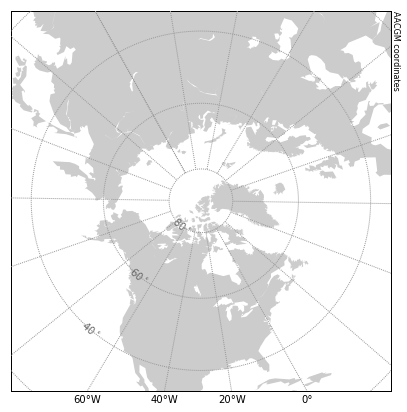

In [2]:
figure(figsize=(15,10))
# Plot map
subplot(121)
m1 = plotUtils.mapObj(boundinglat=30., gridLabels=True, coords='mag')
overlayRadar(m1, fontSize=8, plot_all=True, markerSize=5)
subplot(122)
m2 = plotUtils.mapObj(boundinglat=-30., gridLabels=True, coords='mag')
overlayRadar(m2, fontSize=8, plot_all=True, markerSize=5)

### Plot all radars in geographic coordinates
This is a bit faster (but there are still lots of radars)

In [ ]:
figure(figsize=(15,10))
# Plot map
subplot(121)
m1 = plotUtils.mapObj(boundinglat=30., gridLabels=False)
overlayRadar(m1, fontSize=8, plot_all=True, markerSize=5)
subplot(122)
m2 = plotUtils.mapObj(boundinglat=-30., gridLabels=False)
overlayRadar(m2, fontSize=8, plot_all=True, markerSize=5)

### Plot a single radar, highlight beams
Still a bit slow due to aacgm coordinates

In [ ]:
# Set map
figure(figsize=(10,10))
width = 111e3*40
m = plotUtils.mapObj(width=width, height=width, lat_0=60., lon_0=-30, coords='mag')
code = 'bks'
# Plotting some radars
overlayRadar(m, fontSize=12, codes=code)
# Plot radar fov
overlayFov(m, codes=code, maxGate=75, beams=[0,4,7,8,23])

### Plot a nice view of the mid-latitude radars

In [ ]:
# Set map
fig = figure(figsize=(10,10))
m = plotUtils.mapObj(lat_0=70., lon_0=-60, width=111e3*120, height=111e3*55, coords='mag')
codes = ['wal','fhe','fhw','cve','cvw','hok','ade','adw','bks']
# Plotting some radars
overlayRadar(m, fontSize=12, codes=codes)
# Plot radar fov
overlayFov(m, codes=codes[:-1], maxGate=70)#, fovColor=(.8,.9,.9))
overlayFov(m, codes=codes[-1], maxGate=70, fovColor=(.8,.7,.8), fovAlpha=.5)
fig.tight_layout(pad=2)
rcParams.update({'font.size': 12})

### Plot the RBSP mode
This is sloooooooow...

In [ ]:
# Set map
figure(figsize=(8,8))
lon_0 = -70.
m = plotUtils.mapObj(boundinglat=35., lon_0=lon_0)

# Go through each radar
codes = ['gbr','kap','sas','pgr', \
        'kod','sto','pyk','han', \
        'ksr','cve','cvw','wal', \
        'bks','hok','fhw','fhe', \
        'inv','rkn']
beams = [[3,4,6],[10,11,13],[2,3,5],[12,13,15], \
        [2,3,5],[12,13,15],[0,1,3],[5,6,8], \
        [12,13,15],[0,1,3],[19,20,22],[0,1,3], \
        [12,13,15],[0,1,3],[18,19,21],[0,1,3],\
        [6,7,9],[6,7,9]]
for i,rad in enumerate(codes):
    # Plot radar
    overlayRadar(m, fontSize=12, codes=rad)
    # Plot radar fov
    overlayFov(m, codes=rad, maxGate=75, beams=beams[i])
#savefig('rbsp_beams.pdf')